# Practica DL - Almada Emmanuel


---



# Carga de datos e importacion de librerias.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 !wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2023-02-19 00:08:14--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.249.199.226, 34.248.20.69
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [          <=>       ]  54.31M  3.05MB/s    in 19s     

2023-02-19 00:08:34 (2.85 MB/s) - ‘airbnb-listings.csv’ saved [56950929]



In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt


In [ ]:
del data

In [ ]:
airbnb = pd.read_csv('airbnb-listings.csv',sep=';')

In [ ]:
airbnb.to_csv('/content/drive/My Drive/airbnb.csv', index=False)

Conservo solamente las filas de Madrid.

In [ ]:
data = airbnb[airbnb["City"] == "Madrid"]
print(data.shape[0],'filas con',data.shape[1],'columnas')

13207 filas con 89 columnas


In [ ]:
columnas = ['Thumbnail Url',
            'Property Type',
            'Room Type',
            'Bathrooms',
            'Bedrooms',
            'Beds',
            'Bed Type',
            'Price',
            'Cleaning Fee',
            'Security Deposit',
            'Cancellation Policy']


data = data.loc[:, columnas]



---


# Funciones
limpiar el dataframe.

Funciones necesarias para procesamiento.

In [ ]:
def crear_columnas_one_hot(df, nombre_columna):
    columna = df[nombre_columna]
    one_hot = pd.get_dummies(columna, prefix=nombre_columna)
    df = pd.concat([df, one_hot], axis=1)
    df.drop(columns=[nombre_columna], inplace=True)
    return df



In [ ]:
#funcion para escalar datos

def minmaxScarler(df, col_name):
    scaler = MinMaxScaler()
    df[col_name] = scaler.fit_transform(df[[col_name]])
    return

In [ ]:
#Eliminar outliers
def del_outliers(df, col_name):
    column = df[col_name]
    z_score = np.abs(stats.zscore(column))
    outliers_i = column[z_score > 3].index
    outliers = column[z_score > 3]
    df.drop(outliers_i, inplace=True)
    return

# analisis exploratorio

---



In [ ]:
#Comprobamos los valores nulos de cada columna
pd.options.display.max_rows=None 
data.isnull().sum()

Thumbnail Url          2478
Property Type             0
Room Type                 0
Bathrooms                49
Bedrooms                 23
Beds                     49
Bed Type                  0
Price                     9
Cleaning Fee           5387
Security Deposit       7572
Cancellation Policy       0
dtype: int64

Realizo un drop para conservar los valores sin nan, teniendo en cuenta que solo utilizare 1000 registros.
Si pudiera utilizar todos los datos, rellenaria **Neighbourhood**, ayudandome del zipcode, el **Security Deposit** con un promedio en relacion al precio, los mismo con **Cleaning Fee**

In [ ]:
data = data.dropna()

Luego de la limpieza de nulos:

In [ ]:
print(data.shape[0],'filas con',data.shape[1],'columnas')

3621 filas con 11 columnas


In [ ]:
data.dtypes

Thumbnail Url           object
Property Type           object
Room Type               object
Bathrooms              float64
Bedrooms               float64
Beds                   float64
Bed Type                object
Price                  float64
Cleaning Fee           float64
Security Deposit       float64
Cancellation Policy     object
dtype: object



---


# Property Type
Aqui se puede observar una gran diferencia de datos de Apartments con respecto los demas.


---



In [ ]:
print(data['Property Type'].value_counts())
print('Representado en porcentaje:')
print(data['Property Type'].value_counts(normalize=True))

Apartment             3111
House                  185
Loft                   108
Condominium             93
Other                   58
Bed & Breakfast         52
Chalet                   5
Dorm                     4
Townhouse                2
Tent                     1
Serviced apartment       1
Villa                    1
Name: Property Type, dtype: int64
Representado en porcentaje:
Apartment             0.859155
House                 0.051091
Loft                  0.029826
Condominium           0.025684
Other                 0.016018
Bed & Breakfast       0.014361
Chalet                0.001381
Dorm                  0.001105
Townhouse             0.000552
Tent                  0.000276
Serviced apartment    0.000276
Villa                 0.000276
Name: Property Type, dtype: float64



**Apartment** representa un porcentaje muy grande del total.
Modificaré los valores para convertir la columna en binaria, es decir, **apartament(1)** o **no apartment(0)** para simplificar.

In [ ]:
data['Property Type'].replace(
                      {'Apartment':1.0,
                      'House':0.0,
                      'Loft':0.0,
                      'Condominium':0.0,
                      'Other':0.0,
                      'Bed & Breakfast':0.0,
                      'Chalet':0.0,
                      'Dorm':0.0,
                      'Townhouse':0.0,
                      'Tent':0.0,
                      'Serviced apartment':0.0,
                      'Villa':0.0
     }, inplace=True)


In [ ]:
data['Property Type'].value_counts()

1.0    3111
0.0     510
Name: Property Type, dtype: int64

El nombre Property Type pierde sentido, con lo cual lo cambiaré a Apartment.

In [ ]:
data = data.rename(columns={'Property Type': 'Apartment'})

In [ ]:
data.head(10).T

,0,1,4,15,17,23,26,27,30,31
Thumbnail Url,https://a0.muscache.com/im/pictures/d1a2212d-c...,https://a0.muscache.com/im/pictures/3eb59287-8...,https://a0.muscache.com/im/pictures/6136974/57...,https://a0.muscache.com/im/pictures/faa00251-5...,https://a0.muscache.com/im/pictures/69877124/9...,https://a0.muscache.com/im/pictures/beef54af-7...,https://a0.muscache.com/im/pictures/57baa2b6-1...,https://a0.muscache.com/im/pictures/e1b8a07f-7...,https://a0.muscache.com/im/pictures/12705245/3...,https://a0.muscache.com/im/pictures/39444070/e...
Apartment,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
Room Type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Private room,Entire home/apt
Bathrooms,1.0,1.0,1.0,1.0,1.0,1.5,1.0,1.0,1.5,1.0
Bedrooms,0.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
Beds,1.0,2.0,4.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0
Bed Type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed
Price,50.0,50.0,95.0,45.0,89.0,52.0,68.0,80.0,50.0,50.0
Cleaning Fee,20.0,15.0,60.0,15.0,25.0,8.0,24.0,20.0,50.0,25.0
Security Deposit,100.0,250.0,200.0,150.0,100.0,150.0,130.0,100.0,200.0,90.0


# Room Type


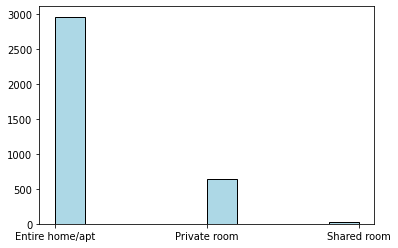

In [ ]:
plt.hist(data['Room Type'], color='lightblue', edgecolor='black')
plt.show()

In [ ]:
data['Room Type'].value_counts()

Entire home/apt    2963
Private room        638
Shared room          20
Name: Room Type, dtype: int64

Shared room tiene solo 20 reg, es menos del 1% de Entere home apt.
Creo que lo mejor es quitar esos registros.

In [ ]:
data['Room Type'].replace({'Shared room': np.nan}, inplace=True)
data = data.dropna()

Ahora que hay solo 2 registros, al igual que con Property Type, remplazo los valores.

In [ ]:
data['Room Type'].replace(
                      {'Entire home/apt':1.0,
                      'Private room':0.0
     }, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Ahora cambio el nombre.

In [ ]:
data = data.rename(columns={'Room Type': 'Entire home/apt'})

In [ ]:
data['Entire home/apt'].value_counts()

1.0    2963
0.0     638
Name: Entire home/apt, dtype: int64

In [ ]:
data.head(10).T

,0,1,4,15,17,23,26,27,30,31
Thumbnail Url,https://a0.muscache.com/im/pictures/d1a2212d-c...,https://a0.muscache.com/im/pictures/3eb59287-8...,https://a0.muscache.com/im/pictures/6136974/57...,https://a0.muscache.com/im/pictures/faa00251-5...,https://a0.muscache.com/im/pictures/69877124/9...,https://a0.muscache.com/im/pictures/beef54af-7...,https://a0.muscache.com/im/pictures/57baa2b6-1...,https://a0.muscache.com/im/pictures/e1b8a07f-7...,https://a0.muscache.com/im/pictures/12705245/3...,https://a0.muscache.com/im/pictures/39444070/e...
Apartment,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
Entire home/apt,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
Bathrooms,1.0,1.0,1.0,1.0,1.0,1.5,1.0,1.0,1.5,1.0
Bedrooms,0.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
Beds,1.0,2.0,4.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0
Bed Type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed
Price,50.0,50.0,95.0,45.0,89.0,52.0,68.0,80.0,50.0,50.0
Cleaning Fee,20.0,15.0,60.0,15.0,25.0,8.0,24.0,20.0,50.0,25.0
Security Deposit,100.0,250.0,200.0,150.0,100.0,150.0,130.0,100.0,200.0,90.0




---

# Bathrooms

Los valores que contengan decimales los redondeare para arriba, los valores 0 los paso a nan y luego elimino.

In [ ]:
data['Bathrooms'].replace({0: np.nan}, inplace=True)
data = data.dropna()

In [ ]:
data['Bathrooms'].replace({0.5:1.0,
                           1.5:2.0,
                           2.5:3.0,
                           3.5:4.0,
                           4.5:5.0,
                           5.5:6.0,
                           6.5:7.0,
                           7.5:8.0}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
data['Bathrooms'].value_counts()

1.0    2642
2.0     794
3.0     132
4.0      17
5.0       8
6.0       4
7.0       1
Name: Bathrooms, dtype: int64

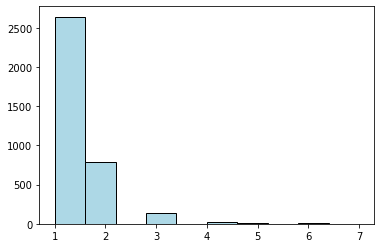

In [ ]:
plt.hist(data['Bathrooms'], color='lightblue', edgecolor='black')
plt.show()

Al parecer los valores mayores a 3 deberian ser eliminados.
procedo a pasar la columna por la funcion que elimina outliers usando zcore.

In [ ]:
del_outliers(data,'Bathrooms')

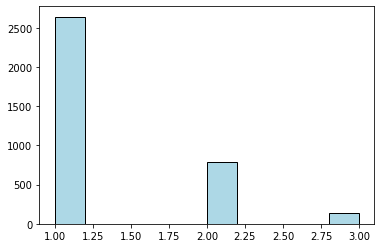

In [ ]:
plt.hist(data['Bathrooms'], color='lightblue', edgecolor='black')
plt.show()

In [ ]:
data['Bathrooms'].value_counts()

1.0    2642
2.0     794
3.0     132
Name: Bathrooms, dtype: int64

In [ ]:
data['Bathrooms'].describe()

count    3568.000000
mean        1.296525
std         0.531665
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: Bathrooms, dtype: float64

---
# Bedrooms

Los valores 0 de **Bedrooms** los paso a nan y luego borro

In [ ]:
data['Bedrooms'].replace({0: np.nan}, inplace=True)
data = data.dropna()

In [ ]:
data['Bedrooms'].value_counts()

1.0    1950
2.0     929
3.0     300
4.0      76
5.0      16
6.0       5
8.0       2
Name: Bedrooms, dtype: int64

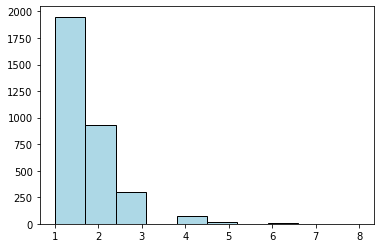

In [ ]:
plt.hist(data['Bedrooms'], color='lightblue', edgecolor='black')
plt.show()

En **Bedrooms** hay datos para eliminar

In [ ]:
del_outliers(data,'Bedrooms')

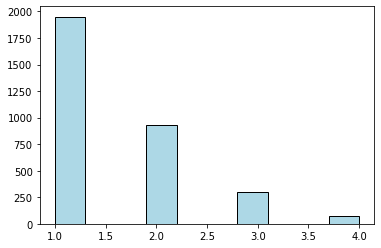

In [ ]:
plt.hist(data['Bedrooms'], color='lightblue', edgecolor='black')
plt.show()

In [ ]:
data['Bedrooms'].value_counts()

1.0    1950
2.0     929
3.0     300
4.0      76
Name: Bedrooms, dtype: int64

---
# Beds

In [ ]:
data['Beds'].value_counts()

1.0     1139
2.0     1057
3.0      528
4.0      293
5.0      123
6.0       68
7.0       22
8.0       10
9.0        7
12.0       3
10.0       3
11.0       2
Name: Beds, dtype: int64

Quito outliers

In [ ]:
del_outliers(data,'Beds')

In [ ]:
data['Beds'].value_counts()

1.0    1139
2.0    1057
3.0     528
4.0     293
5.0     123
6.0      68
Name: Beds, dtype: int64

---
# bed type


Aqui parece interesante agrupar las **bed type** que no sean Real bed.

In [ ]:
data['Bed Type'].value_counts()

Real Bed         3145
Pull-out Sofa      54
Futon               6
Couch               3
Name: Bed Type, dtype: int64

In [ ]:
data['Bed Type'].replace({'Real Bed':1.0,
                          'Pull-out Sofa':0.0,
                          'Futon':0.0,
                          'Couch':0.0}
                         , inplace=True)

In [ ]:
data['Bed Type'].value_counts()

1.0    3145
0.0      63
Name: Bed Type, dtype: int64

Cambio de nombre.

In [ ]:
data = data.rename(columns={'Bed Type': 'Real Bed'})

Ahora si quedo listo.

In [ ]:
data['Real Bed'].value_counts()

1.0    3145
0.0      63
Name: Real Bed, dtype: int64

In [ ]:
data.head(10).T

,1,4,15,17,23,26,27,30,31,32
Thumbnail Url,https://a0.muscache.com/im/pictures/3eb59287-8...,https://a0.muscache.com/im/pictures/6136974/57...,https://a0.muscache.com/im/pictures/faa00251-5...,https://a0.muscache.com/im/pictures/69877124/9...,https://a0.muscache.com/im/pictures/beef54af-7...,https://a0.muscache.com/im/pictures/57baa2b6-1...,https://a0.muscache.com/im/pictures/e1b8a07f-7...,https://a0.muscache.com/im/pictures/12705245/3...,https://a0.muscache.com/im/pictures/39444070/e...,https://a0.muscache.com/im/pictures/54262579/c...
Apartment,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
Entire home/apt,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
Bathrooms,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0
Bedrooms,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
Beds,2.0,4.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
Real Bed,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Price,50.0,95.0,45.0,89.0,52.0,68.0,80.0,50.0,50.0,40.0
Cleaning Fee,15.0,60.0,15.0,25.0,8.0,24.0,20.0,50.0,25.0,20.0
Security Deposit,250.0,200.0,150.0,100.0,150.0,130.0,100.0,200.0,90.0,150.0


---
# Price

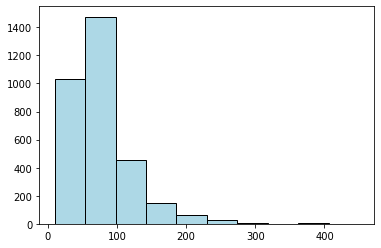

In [ ]:
plt.hist(data['Price'], color='lightblue', edgecolor='black')
plt.show()

Quito outliers:

In [ ]:
del_outliers(data,'Price')

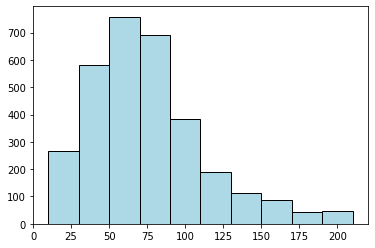

In [ ]:
plt.hist(data['Price'], color='lightblue', edgecolor='black')
plt.show()

In [ ]:
data.head(10).T

,1,4,15,17,23,26,27,30,31,32
Thumbnail Url,https://a0.muscache.com/im/pictures/3eb59287-8...,https://a0.muscache.com/im/pictures/6136974/57...,https://a0.muscache.com/im/pictures/faa00251-5...,https://a0.muscache.com/im/pictures/69877124/9...,https://a0.muscache.com/im/pictures/beef54af-7...,https://a0.muscache.com/im/pictures/57baa2b6-1...,https://a0.muscache.com/im/pictures/e1b8a07f-7...,https://a0.muscache.com/im/pictures/12705245/3...,https://a0.muscache.com/im/pictures/39444070/e...,https://a0.muscache.com/im/pictures/54262579/c...
Apartment,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
Entire home/apt,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
Bathrooms,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0
Bedrooms,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
Beds,2.0,4.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
Real Bed,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Price,50.0,95.0,45.0,89.0,52.0,68.0,80.0,50.0,50.0,40.0
Cleaning Fee,15.0,60.0,15.0,25.0,8.0,24.0,20.0,50.0,25.0,20.0
Security Deposit,250.0,200.0,150.0,100.0,150.0,130.0,100.0,200.0,90.0,150.0


---
# Cleaning Fee


In [ ]:
data['Cleaning Fee'].value_counts()

30.0     685
20.0     411
25.0     302
40.0     286
15.0     207
50.0     188
10.0     179
35.0     150
60.0      79
5.0       69
45.0      54
70.0      45
8.0       32
24.0      30
36.0      26
18.0      26
12.0      25
29.0      23
49.0      21
32.0      19
33.0      16
80.0      16
90.0      15
39.0      14
19.0      14
48.0      14
22.0      14
100.0     13
55.0      13
75.0      12
9.0       12
17.0      11
16.0      10
28.0      10
65.0      10
7.0       10
42.0      10
23.0       9
85.0       7
27.0       6
6.0        6
140.0      5
78.0       5
95.0       4
38.0       4
37.0       3
26.0       3
21.0       3
120.0      3
14.0       3
11.0       2
77.0       2
47.0       2
13.0       2
59.0       2
68.0       2
52.0       2
72.0       2
58.0       2
4.0        1
43.0       1
41.0       1
44.0       1
34.0       1
69.0       1
79.0       1
54.0       1
Name: Cleaning Fee, dtype: int64

In [ ]:
data['Cleaning Fee'].describe()

count    3158.000000
mean       30.795440
std        16.854798
min         4.000000
25%        20.000000
50%        30.000000
75%        40.000000
max       140.000000
Name: Cleaning Fee, dtype: float64

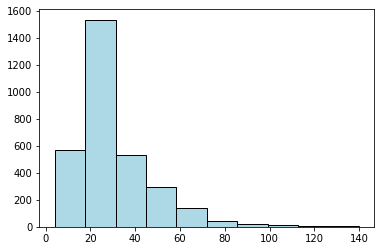

In [ ]:
plt.hist(data['Cleaning Fee'], color='lightblue', edgecolor='black')
plt.show()

In [ ]:
del_outliers(data,'Cleaning Fee')

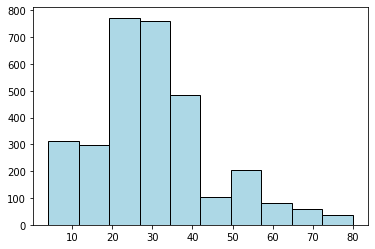

In [ ]:
plt.hist(data['Cleaning Fee'], color='lightblue', edgecolor='black')
plt.show()

In [ ]:
# Creo intervalos para las categorías
intervalos = [0, 30, 60, float('inf')] 
# categorías
nombres = ['barato', 'medio', 'caro']


data['Cleaning Fee'] = pd.cut(data['Cleaning Fee'], bins=intervalos, labels=nombres)



In [ ]:
data['Cleaning Fee'].value_counts()

barato    2105
medio      910
caro        96
Name: Cleaning Fee, dtype: int64

In [ ]:
data.columns

Index(['Thumbnail Url', 'Apartment', 'Entire home/apt', 'Bathrooms',
       'Bedrooms', 'Beds', 'Real Bed', 'Price', 'Cleaning Fee',
       'Security Deposit', 'Cancellation Policy'],
      dtype='object')

In [ ]:
data = crear_columnas_one_hot(data,'Cleaning Fee')

In [ ]:
data.columns

Index(['Thumbnail Url', 'Apartment', 'Entire home/apt', 'Bathrooms',
       'Bedrooms', 'Beds', 'Real Bed', 'Price', 'Security Deposit',
       'Cancellation Policy', 'Cleaning Fee_barato', 'Cleaning Fee_medio',
       'Cleaning Fee_caro'],
      dtype='object')

---
# Security Deposit



In [ ]:
data['Security Deposit'].value_counts()

100.0    855
200.0    697
150.0    611
300.0    215
250.0    155
90.0      72
120.0     51
500.0     46
400.0     38
96.0      31
94.0      31
95.0      28
350.0     25
85.0      23
175.0     16
80.0      16
450.0     13
180.0     11
99.0      10
125.0      8
600.0      8
130.0      7
89.0       7
225.0      7
91.0       6
199.0      6
87.0       6
70.0       6
290.0      6
88.0       6
190.0      6
299.0      6
86.0       5
93.0       5
110.0      5
160.0      4
170.0      4
188.0      3
220.0      3
295.0      3
92.0       3
140.0      2
103.0      2
117.0      2
234.0      2
800.0      2
900.0      2
700.0      2
281.0      2
84.0       2
97.0       2
550.0      2
195.0      2
159.0      1
221.0      1
410.0      1
75.0       1
113.0      1
275.0      1
148.0      1
98.0       1
298.0      1
320.0      1
118.0      1
198.0      1
490.0      1
76.0       1
115.0      1
702.0      1
101.0      1
154.0      1
128.0      1
280.0      1
166.0      1
650.0      1
105.0      1
Name: Securi

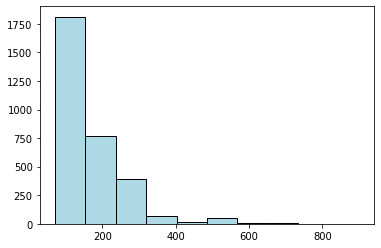

In [ ]:
plt.hist(data['Security Deposit'], color='lightblue', edgecolor='black')
plt.show()

In [ ]:
del_outliers(data,'Security Deposit')

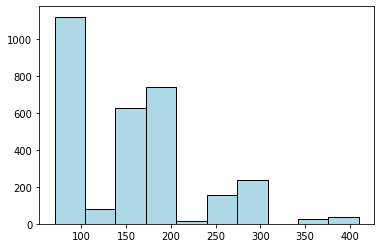

In [ ]:
plt.hist(data['Security Deposit'], color='lightblue', edgecolor='black')
plt.show()

In [ ]:
data['Security Deposit'].describe()

count    3033.000000
mean      163.899439
std        69.637050
min        70.000000
25%       100.000000
50%       150.000000
75%       200.000000
max       410.000000
Name: Security Deposit, dtype: float64

In [ ]:
# Creo intervalos para las categorías
bins = [0, 200, 400, float('inf')] 
# categorías
names = ['Barato', 'Medio', 'Caro']


data['Security Deposit'] = pd.cut(data['Security Deposit'], bins=bins, labels=names)



In [ ]:
data['Security Deposit'].value_counts()

Barato    2565
Medio      467
Caro         1
Name: Security Deposit, dtype: int64

In [ ]:
data = crear_columnas_one_hot(data,'Security Deposit')



---
# Cancellation Policy


In [ ]:
data['Cancellation Policy'].value_counts()

strict      1440
moderate    1059
flexible     534
Name: Cancellation Policy, dtype: int64

In [ ]:
data = crear_columnas_one_hot(data,'Cancellation Policy')

In [ ]:
data.head(4).T

,1,4,15,17
Thumbnail Url,https://a0.muscache.com/im/pictures/3eb59287-8...,https://a0.muscache.com/im/pictures/6136974/57...,https://a0.muscache.com/im/pictures/faa00251-5...,https://a0.muscache.com/im/pictures/69877124/9...
Apartment,1.0,1.0,0.0,1.0
Entire home/apt,1.0,1.0,1.0,1.0
Bathrooms,1.0,1.0,1.0,1.0
Bedrooms,1.0,2.0,1.0,1.0
Beds,2.0,4.0,2.0,1.0
Real Bed,1.0,1.0,1.0,1.0
Price,50.0,95.0,45.0,89.0
Cleaning Fee_barato,1,0,1,1
Cleaning Fee_medio,0,1,0,0


In [ ]:
data.to_csv('/content/drive/My Drive/data_limpio.csv', index=False)



---

# Descarga de Imagenes

In [ ]:
import imageio as io
import numpy as np
import pandas as pd
import cv2

In [ ]:
n_images = 800
images = np.zeros((n_images, 64, 64, 3), dtype=np.uint8)
urls = data['Thumbnail Url'] #aqui cargar las imagenes

i_aux = 0
good_urls = []
for i_img, url in enumerate(urls):
    if len(good_urls) >= n_images:
        # ya tenemos n_images imágenes
        break
    try:
        img = io.imread(url)
        images[i_aux] = cv2.resize(img, (64, 64))
        good_urls.append(i_img)
        i_aux += 1
        print(f'Imagen {i_img} descargada')
        print(len(good_urls))
    except IOError as err:
        pass

Imagen 0 descargada
1
Imagen 1 descargada
2
Imagen 2 descargada
3
Imagen 3 descargada
4
Imagen 4 descargada
5
Imagen 5 descargada
6
Imagen 6 descargada
7
Imagen 7 descargada
8
Imagen 8 descargada
9
Imagen 9 descargada
10
Imagen 10 descargada
11
Imagen 11 descargada
12
Imagen 12 descargada
13
Imagen 13 descargada
14
Imagen 14 descargada
15
Imagen 15 descargada
16
Imagen 16 descargada
17
Imagen 17 descargada
18
Imagen 18 descargada
19
Imagen 19 descargada
20
Imagen 20 descargada
21
Imagen 21 descargada
22
Imagen 22 descargada
23
Imagen 23 descargada
24
Imagen 24 descargada
25
Imagen 25 descargada
26
Imagen 26 descargada
27
Imagen 27 descargada
28
Imagen 28 descargada
29
Imagen 29 descargada
30
Imagen 30 descargada
31
Imagen 31 descargada
32
Imagen 32 descargada
33
Imagen 33 descargada
34
Imagen 34 descargada
35
Imagen 35 descargada
36
Imagen 36 descargada
37
Imagen 37 descargada
38
Imagen 38 descargada
39
Imagen 39 descargada
40
Imagen 40 descargada
41
Imagen 41 descargada
42
Imagen 42 d

In [ ]:
np.save('images.npy', images)
#np.save('data_limpio2.npy', data)

# Guardado/carga de img y df

In [4]:
import pandas as pd
import numpy as np

In [4]:
# Guardo las imagenes que tienen good urls
data = data.iloc[good_urls, :]

NameError: ignored

In [ ]:
!cp images.npy /content/drive/My\ Drive/images.npy
#!cp data_limpio2.npy /content/drive/My\ Drive/data_limpio2.npy

In [ ]:
# Guardo en Drive
data.to_csv('/content/drive/My Drive/data_limpio.csv', index=False)

In [5]:
# Cargar imganes

images = np.load('/content/drive/My Drive/images.npy')
print(images.shape)

(800, 64, 64, 3)


In [13]:
# Para carga el df
data = pd.read_csv('/content/drive/MyDrive/data_limpio.csv')

# Regresion

---



In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalMaxPool2D, Input, concatenate
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, GlobalMaxPool2D
from tensorflow.keras.optimizers import Adam


In [14]:
# Para evitar tener que cargarlo
df = data 

In [20]:
df.columns

Index(['Thumbnail Url', 'Apartment', 'Entire home/apt', 'Bathrooms',
       'Bedrooms', 'Beds', 'Real Bed', 'Price', 'Cleaning Fee_barato',
       'Cleaning Fee_medio', 'Cleaning Fee_caro', 'Security Deposit_Barato',
       'Security Deposit_Medio', 'Security Deposit_Caro',
       'Cancellation Policy_flexible', 'Cancellation Policy_moderate',
       'Cancellation Policy_strict'],
      dtype='object')

In [15]:
# coge todas menos price y thumbnail
columnas = [col for col in df.columns if col not in ['Price', 'Thumbnail Url']]

X = df[columnas].astype('float32')

y = df['Price'].astype('float32')


In [16]:
# Entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (640, 15)
X_test (160, 15)
y_train (640,)
y_test (160,)


In [23]:
# Le agrego la dim
X_train = np.random.rand(640, 15)
X_test = np.random.rand(160, 15)
y_train = np.random.rand(640, 1)
y_test = np.random.rand(160, 1)


In [24]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (640, 15)
X_test (160, 15)
y_train (640, 1)
y_test (160, 1)


In [25]:
# fun para Nnormalización y desnormalización
def normalizar(datos):
    return (datos - datos.mean()) / datos.std()

def desnormalizar(datos_normalizados, datos_originales):
    return (datos_normalizados * datos_originales.std()) + datos_originales.mean()


# Normalizar datos
X_train_norm = normalizar(X_train)
X_test_norm = normalizar(X_test)
y_train_norm = normalizar(y_train)
y_test_norm = normalizar(y_test)


# hiperparametros
epocas = 200
tasas_aprendizaje = [0.001] #[0.1,0.001, 0.0001]
n_capas = [8] #[2,3,5,8,13,21]
n_neuronas_por_capa = [16] #[8,16,32,64,128]
optimizadores = ['sgd'] #['rmsprop', 'sgd','adam']
batch_size=32


# Var aux
mejor_modelo = None
mejor_mae = float('inf')
mejor_perdida = float('inf')
mejor_historial = None


historiales = []


for tasa_aprendizaje in tasas_aprendizaje:
    for n_capas_ocultas in n_capas:
        for n_neuronas in n_neuronas_por_capa:
            for optimizador in optimizadores:

                # Modelo
                modelo = keras.Sequential([
                    layers.Dense(n_neuronas, activation='relu', input_shape=(X_train_norm.shape[1],))
                ])
                for i in range(n_capas_ocultas-1):
                    modelo.add(layers.Dense(n_neuronas, activation='relu'))
                modelo.add(layers.Dense(1, activation='linear'))


                # Comp modelo
                if optimizador == 'sgd':
                    opt = keras.optimizers.SGD(learning_rate=tasa_aprendizaje)
                elif optimizador == 'rmsprop':
                    opt = keras.optimizers.RMSprop(learning_rate=tasa_aprendizaje)
                else:
                    opt = keras.optimizers.Adam(learning_rate=tasa_aprendizaje)
                modelo.compile(optimizer=opt, loss='mse', metrics=['mae'])


                # train model
                historial = modelo.fit(X_train_norm, y_train_norm, batch_size=batch_size, epochs=epocas, validation_split=0.2, shuffle=True)
                historiales.append(historial)
                # Eval  modelo
                perdida_prueba, mae_prueba = modelo.evaluate(X_test_norm, y_test_norm)



                # Pred y desnormalizar
                y_pred_norm = modelo.predict(X_test_norm)
                y_pred = desnormalizar(y_pred_norm, y_test)
                y_test_orig = desnormalizar(y_test_norm, y_test)


                # Cal errores
                mae = mean_absolute_error(y_test_orig, y_pred)
                mse = mean_squared_error(y_test_orig, y_pred)


                # Guardar mejor modelo
                if mae_prueba < mejor_mae and perdida_prueba < mejor_perdida:
                    mejor_modelo = modelo
                    mejor_mae = mae_prueba
                    mejor_perdida = perdida_prueba
                    mejor_historial = historial


Epoch 1/200
14/14 [==============================] - 1s 18ms/step - loss: 0.9914 - mae: 0.8578 - val_loss: 1.0222 - val_mae: 0.8730
Epoch 2/200
14/14 [==============================] - 0s 7ms/step - loss: 0.9910 - mae: 0.8576 - val_loss: 1.0223 - val_mae: 0.8733
Epoch 3/200
14/14 [==============================] - 0s 6ms/step - loss: 0.9904 - mae: 0.8573 - val_loss: 1.0224 - val_mae: 0.8736
Epoch 4/200
14/14 [==============================] - 0s 7ms/step - loss: 0.9901 - mae: 0.8571 - val_loss: 1.0225 - val_mae: 0.8739
Epoch 5/200
14/14 [==============================] - 0s 6ms/step - loss: 0.9898 - mae: 0.8570 - val_loss: 1.0226 - val_mae: 0.8741
Epoch 6/200
14/14 [==============================] - 0s 6ms/step - loss: 0.9893 - mae: 0.8568 - val_loss: 1.0228 - val_mae: 0.8744
Epoch 7/200
14/14 [==============================] - 0s 7ms/step - loss: 0.9890 - mae: 0.8567 - val_loss: 1.0229 - val_mae: 0.8746
Epoch 8/200
14/14 [==============================] - 0s 6ms/step - loss: 0.9887 - 

In [26]:
print("Hiperparametros  mejor modelo encontrado:")
print("lr:", mejor_modelo.optimizer.learning_rate.numpy())
print("Capas ocultas:", len(mejor_modelo.layers) - 2)
print("Neuronas x capa oculta:", mejor_modelo.layers[0].units)
print("Optimizador:", mejor_modelo.optimizer.__class__.__name__)
print("Batch:", batch_size)


Hiperparametros  mejor modelo encontrado:
lr: 0.001
Capas ocultas: 7
Neuronas x capa oculta: 16
Optimizador: SGD
Batch: 32


Hiperparametros  mejor modelo encontrado:
lr: 0.1
Capas ocultas: 1
Neuronas x capa oculta: 16
Optimizador: SGD
Batch: 32

5/5 [==============================] - 0s 3ms/step


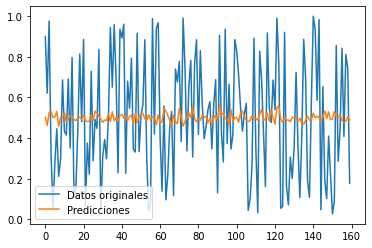

5/5 [==============================] - 0s 5ms/step - loss: 0.9893 - mae: 0.8568
Loss=[0.9892929196357727, 0.8567891120910645]


In [27]:
# Predicciones del mejor modelo
y_pred_norm = mejor_modelo.predict(X_test_norm)
y_pred = desnormalizar(y_pred_norm, y_test)
y_test_orig = desnormalizar(y_test_norm, y_test)

# Grafica
plt.plot(y_test_orig, label='Datos originales')
plt.plot(y_pred, label='Predicciones')
plt.legend()
plt.show()

# Eval en d normalizados
loss = mejor_modelo.evaluate(X_test_norm, y_test_norm)
print(f'Loss={loss}')




---

# CNN

In [8]:
# Dividir test train
img_train, img_test = train_test_split(images, test_size=0.2, random_state=42)

In [17]:
print('-----primer split--------')
print(img_train.shape,'img_train')
print(img_test.shape,'img_test')
print(y_train.shape,'price y_train')
print(y_test.shape,'price y_test')

-----primer split--------
(640, 64, 64, 3) img_train
(160, 64, 64, 3) img_test
(640,) price y_train
(160,) price y_test


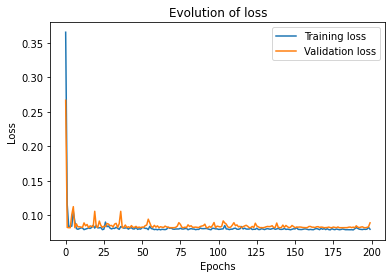

In [37]:


# Normalizar imágenes
img_train = img_train / 255
img_test = img_test / 255

# VGG16 congelando algunas capas
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
for layer in base_model.layers:
    if layer.name == 'block5_conv1':
        break
    layer.trainable = False

# Capas personalizada
x = base_model.output
x = GlobalMaxPool2D(name='GlobalMaxPool')(x)
x = Dense(16, activation='relu', name='fc1')(x)
predictions = Dense(1, activation='linear', name='prediction')(x)

# Model
model1 = Model(inputs=base_model.input, outputs=predictions)
model1.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mean_squared_error'])


history = model1.fit(img_train, y_train, validation_split=0.2, epochs=200, batch_size=32, verbose=1)

# Obt val
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Graf
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Evolution of loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




---

# Hibrida

In [ ]:
from tensorflow.keras.layers import Dropout

input1 = mejor_modelo.input
input2 = model1.input
output1 = mejor_modelo.output
output2 = model1.output
merged = concatenate([output1, output2])
x = Dense(64, activation='relu')(merged)
x = Dropout(0.2)(x) 
x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x) 
x = Dense(1, activation='linear')(x)
modelo_hibrido = Model(inputs=[input1, input2], outputs=x)

# Compilar y entrenar el modelo híbrido
modelo_hibrido.compile(optimizer='adam', loss='mse', metrics=['mean_squared_error'])
historial = modelo_hibrido.fit([X_train_norm, img_train], y_train_norm, epochs=200, validation_split=0.2, shuffle=True)

# Gráfica del loss
import matplotlib.pyplot as plt

plt.plot(historial.history['loss'], label='train')
plt.plot(historial.history['val_loss'], label='val')
plt.title('Evolución del loss durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/200
16/16 [==============================] - 7s 58ms/step - loss: 0.3167 - mean_squared_error: 0.3167 - val_loss: 1.9227 - val_mean_squared_error: 1.9227
Epoch 2/200
16/16 [==============================] - 0s 28ms/step - loss: 0.1312 - mean_squared_error: 0.1312 - val_loss: 1.9183 - val_mean_squared_error: 1.9183
Epoch 3/200
16/16 [==============================] - 0s 28ms/step - loss: 0.0879 - mean_squared_error: 0.0879 - val_loss: 1.7711 - val_mean_squared_error: 1.7711
Epoch 4/200
16/16 [==============================] - 0s 27ms/step - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 1.9380 - val_mean_squared_error: 1.9380
Epoch 5/200
16/16 [==============================] - 0s 28ms/step - loss: 0.0740 - mean_squared_error: 0.0740 - val_loss: 1.8957 - val_mean_squared_error: 1.8957
Epoch 6/200
16/16 [==============================] - 0s 27ms/step - loss: 0.0604 - mean_squared_error: 0.0604 - val_loss: 1.8592 - val_mean_squared_error: 1.8592
Epoch 7/200
16/16 [=========